In [22]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Loading data
df_churn = pd.read_csv("../Data/Churn.csv")

### 1. Write the shape of the dataset in terms of number of observations and variables.

In [3]:
print("Number of observations -",df_churn.shape[0])
print("Number of variables -",df_churn.shape[1])

Number of observations - 10000
Number of variables - 14


### 2. Identify the type of variable and check any missing values are present.

In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 3. How many unique values do you have for each variable?

In [5]:
df_churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### 4. Inspect the dataset and clean the outliers. Also, rename the columns to avoid captial letters.

In [6]:
df_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100110.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57545.696058,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149400.107500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,301348.880000,1.000000


In [ ]:
def remove_outlier(df, col_name):
    plt.figure(figsize=(20,20))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(x = col_name,data = df, ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
    sns.boxplot(x = col_name,data = df, ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    plt.show()
    return df

In [7]:
Q1 = np.quantile(df_churn['Age'],0.25)
Q3 = np.quantile(df_churn['Age'],0.75)
IQR = Q3 - Q1
df_cleaned = df_churn[~((df_churn["Age"] < (Q1 - 1.5 * IQR)) |(df_churn["Age"] > (Q3 + 1.5 * IQR)))]
df_cleaned

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,301348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
# Dropping unique columns
df_cleaned.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

C:\Users\klmsa\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
# Renaming column names
new_names = {
    'CreditScore': 'credit_score',
    'Geography': 'country',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'number_products',
    'HasCrCard': 'owns_credit_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'exited'
}
df_cleaned.rename(columns=new_names, inplace=True)

C:\Users\klmsa\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
df_cleaned.head()

,credit_score,country,gender,age,tenure,balance,number_products,owns_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,301348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 5. Identify the target variable in the dataset and print the number of lost customers.

#### The Target Variable is 'exited'.

In [11]:
print("Number of Lost Customers: \n",df_cleaned['exited'].value_counts())

Number of Lost Customers: 
 0    7677
1    1964
Name: exited, dtype: int64


### 6. Write your observation on result of Question 5. Also, comment on data imbalance issue when an unequal distribution is seen on the dataset.

#### Almost 20% of employees have exited the company.
#### The lost customers : retained customers are so much imbalanced that only around only 20% exited and the customers retained is of 80% of total records.
#### Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce errors. However, if the data set in imbalance then In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class.

### 7. Analyze the relationship between categorical variables and the target variables. Use appropriate plots, manipulations, and calculation to report your observations on customer churn by gender, geographical location, and IsActiveMember.

In [27]:
df_cleaned_cat = df_cleaned[["gender","is_active_member","country"]]
Y = df_cleaned["exited"]

<AxesSubplot:xlabel='gender', ylabel='Count'>

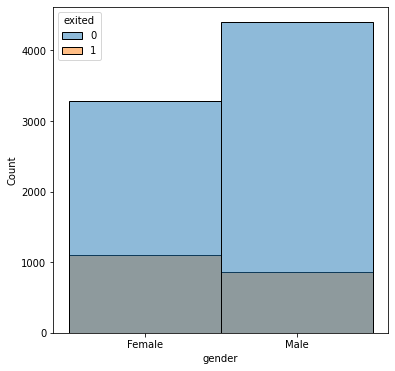

In [29]:
# Customer churn by gender with target varaible
plt.figure(figsize = (6,6))
sns.histplot(data=df_cleaned, x="gender", hue="exited")

<AxesSubplot:xlabel='country', ylabel='Count'>

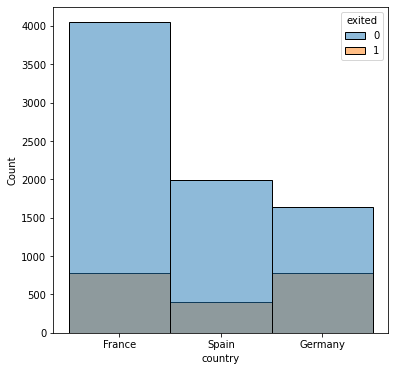

In [30]:
# Customer churn by country with target varaible
plt.figure(figsize = (6,6))
sns.histplot(data=df_cleaned, x="country", hue="exited")

<AxesSubplot:xlabel='is_active_member', ylabel='Count'>

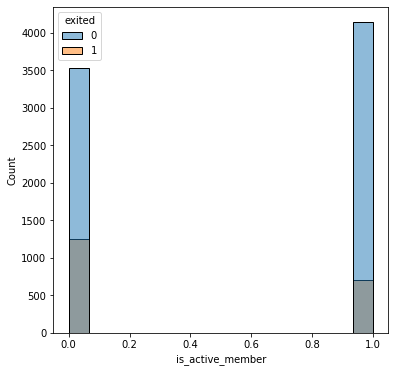

In [32]:
# Customer churn by IsActiveMember with target varaible
plt.figure(figsize = (6,6))
sns.histplot(data=df_cleaned, x="is_active_member", hue="exited")

### 8. Analyze the relationship between continuous variables and target variables. Use appropriate plots and manipulations to report your observation on age of customer, comparison of credit score, balance, and estimated salary.

In [34]:
# Slicing continous variables
df_cleaned_cont = df_cleaned[["age","credit_score","balance","estimated_salary"]]
Y = df_cleaned["exited"]

<AxesSubplot:xlabel='age', ylabel='Count'>

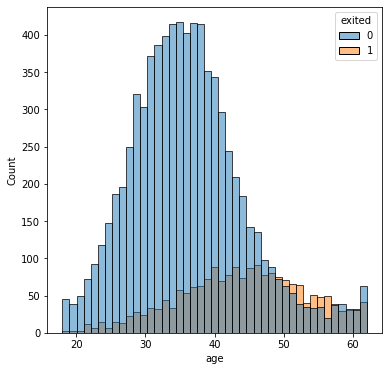

In [35]:
# Customer churn by age with target varaible
plt.figure(figsize = (6,6))
sns.histplot(data=df_cleaned, x="age", hue="exited")

<AxesSubplot:xlabel='balance', ylabel='Count'>

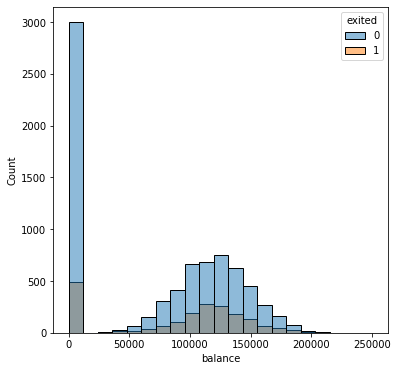

In [37]:
# Customer churn by balance with target varaible
plt.figure(figsize = (6,6))
sns.histplot(data=df_cleaned, x="balance", hue="exited")

<AxesSubplot:xlabel='estimated_salary', ylabel='Count'>

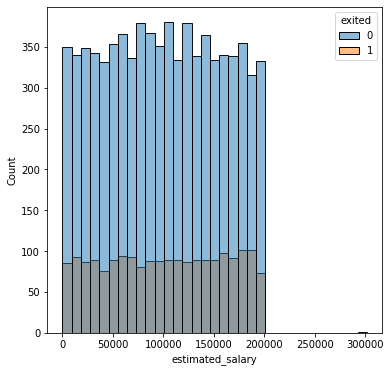

In [39]:
# Customer churn by estimated_salary with target varaible
plt.figure(figsize = (6,6))
sns.histplot(data=df_cleaned, x="estimated_salary", hue="exited")

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

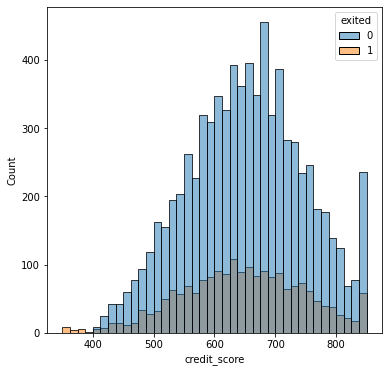

In [40]:
# Customer churn by credit_score with target varaible
plt.figure(figsize = (6,6))
sns.histplot(data=df_cleaned, x="credit_score", hue="exited")

### 9. Finally, examine the correlation to report the codependency between different continuous variables.

In [6]:
df_churn.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.006587,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.014989,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001497,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007095,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007417,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012364,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.013879,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009703,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011077,-0.156128
EstimatedSalary,-0.006587,0.014989,-0.001497,-0.007095,0.007417,0.012364,0.013879,-0.009703,-0.011077,1.000000,0.012777


#### From this corr matrix, we can analyse that "Age" and "Is active member" are a high codependency compared to all features in predicted the exited feature